In [ ]:
!pip install pandas 
!pip install seaborn
!pip install matplotlib
!pip install numpy 
!pip install scipy 
!pip install statsmodels 


In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
from scipy.stats import ttest_1samp, ttest_ind, f_oneway
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from scipy.stats import shapiro, probplot

In [4]:
'''
Data Cleaning function
'''
def clean_data(filename):
    '''
    Data Cleaning function
    Created a dictionary of key value pairs to replace
    categorical variables of object data type in pandas
    to a numerical data type in order to make quantifying
    easier for the functions applied in the assignment
    '''


    tp_dataset = pd.read_csv(filename, sep = ',', header = 0)

    clean_categorical = {"Arrest_Month": {'Jan-Mar': 1, 'Apr-June': 2, 'July-Sept': 3, 'Oct-Dec': 4},
                         "Age_group__at_arrest_": {'Aged 17 years and under': 1, 'Aged 17 years and younger': 1,
                                                    'Aged 18 to 24 years': 2, 'Aged 25 to 34 years': 3,
                                                    'Aged 35 to 44 years': 4, 'Aged 45 to 54 years': 5,
                                                    'Aged 55 to 64 years': 6, 'Aged 65 and older': 7,
                                                    'Aged 65 years and older': 7},
                         "Sex": {'F':1,'M':2,'U':3},
                         "Perceived_Race": {'Black': 1, 'East/Southeast Asian': 2, 'Indigenous': 3, 'Latino': 4,
                                            'Middle-Eastern': 5, 'South Asian': 6, 'Unknown or Legacy': 7, 'White': 8},
                         "Occurrence_Category":{'Assault': 1, 'Assault & Other crimes against persons': 2, 'Break & Enter': 3,
                                                'Break and Enter': 3, 'Crimes against Children': 4, 'Drug Related': 5,
                                                'Fraud': 6, 'FTA/FTC, Compliance Check & Parollee': 7, 'FTA/FTC/Compliance Check/Parollee': 8,
                                                'Harassment & Threatening': 9, 'Harassment/Threatening': 10, 'Homicide':11, 'Impaired':12,
                                                'LLA':13, 'Mental Health': 14, 'Mischief': 15, 'Mischief & Fraud': 16, 'Other Offence': 17,
                                                'Other Statute': 18, 'Other Statute & Other Incident Type':19,'Police Category - Administrative': 20,
                                                'Robbery & Theft': 21, 'Robbery/Theft': 22, 'Sexual Related Crime':23, 'Sexual Related Crimes & Crimes Against Children':24,
                                                'Vehicle Related': 25, 'Vehicle Related (inc. Impaired)': 26, 'Warrant': 27, 'Weapons': 28, 'Weapons & Homicide':29, 'Police Category - Incident': 30}}

    new_df = tp_dataset.replace(clean_categorical) # Use pandas replace to make the necessary
    df_no_nan = new_df.fillna(0)
    return eda_plots(df_no_nan), eda_t_test_one_samp(df_no_nan)

    # Important when running this code:
      # to get individual outputs for each outcome: e.g. T-tests, plots/graphs, Anovas 
      # return only one the functions in return statement below and comment the rest out 
      # This will allow you to see individual output for each requirement of the assignment 
      # Right now I return everything at once, which is okay for submission but can be a bit confusing for interpretation of the output 

In [5]:
def eda_plots(cleaned_dataset):
    '''
    This function will take the cleaned dataset
    and output various plots and tables for eda
    '''
    sns.catplot(data=cleaned_dataset, x= "StripSearch", y= "Sex", kind="bar") # Bar Chart describing relationship between strip search and gender
    plt.show()
    sns.heatmap(cleaned_dataset.corr()) # Correlation heat map of the data set
    sns.displot(cleaned_dataset, x="Occurrence_Category", hue= "Actions_at_arrest___Mental_inst")
    sns.displot(cleaned_dataset, x="Occurrence_Category", hue= "Arrest_Year") # Displaying the number 
    plt.show()
    moment_estimator = cleaned_dataset.describe(include = 'all') # Table to describe methods of moments
    print(moment_estimator)

In [6]:
def eda_t_test_one_samp(cleaned_dataset):
    variables_of_interest = ["Arrest_Month","Age_group__at_arrest_","Sex","Perceived_Race","Occurrence_Category"]

    for i in range(len(variables_of_interest)):
        # Sample size stored in n
        x = cleaned_dataset[variables_of_interest[i]]
        pop_mean = cleaned_dataset['Actions_at_arrest___Mental_inst'].mean()

        # Create a one-sample t-test
        t_stat, p_val = ttest_1samp(x, pop_mean)

        # Print results
        print(variables_of_interest[i]+':',' t-statistic: ', t_stat)
        print(variables_of_interest[i]+':',' p-value: ', p_val)

        # Create two-sided test
        t_stat, p_val = ttest_1samp(x, pop_mean, alternative ='greater')
        print(variables_of_interest[i]+':',' p-value: ', p_val, 'greater')
        t_stat, p_val = ttest_1samp(x, pop_mean, alternative ='less')
        print(variables_of_interest[i]+':',' p-value: ', p_val, 'less')

        # Confidence Level
        alpha = 0.05 # 95 % Confidence Interval
        sample_size = x.sample()
        x_bar = sample_size.mean()
        s = np.std(x, ddof = 1) # Sample standard deviation
        sem = s / np.sqrt(sample_size)
        dof = sample_size - 1
        # Percent-point function of the t-distribution
        t = stats.t.ppf(1 - (alpha / 2), dof)
        # Margin of Error
        d = t * sem
        # Intervals
        upper_ci = x_bar + d
        lowe_ci = x_bar - d


In [7]:
# Power Analysis

def pooled_standard_deviation(sample1,sample2):
  #calculate the sample size 
  n1, n2 = len(sample1), len(sample2)
  #calculate the variances 
  var1, var2 = np.var(sample1, ddof=1), np.var(sample2,ddof=1)
  #calculate the pooled standard deviation
  numerator = ((n1-1) * var1) + ((n2-1) * var2)
  denominator = n1+n2-2 
  return np.sqrt(numerator/denominator)

# function to calculate Cohen's d for independent samples 
def Cohens_d(sample1, sample2):
  u1, u2 = np.mean(sample1), np.mean(sample2)
  s_pooled = pooled_standard_deviation(sample1, sample2)
  return ((u1-u2) / s_pooled)


In [9]:
# create two separate datasets for males and females 
df = pd.read_csv('Arrests_and_Strip_Searches_(RBDC-ARR-TBL-001).csv')
cleaned_df = df.fillna(0)

males_data = cleaned_df[cleaned_df['Sex']== 'M']
females_data = cleaned_df[cleaned_df['Sex']== 'F']

# subset each dataset by year 
males_2020 = males_data[(males_data['Arrest_Year']==2020) & (males_data['Sex']=='M')]['StripSearch']
males_2021 = males_data[(males_data['Arrest_Year']==2021) & (males_data['Sex']=='M')]['StripSearch']

females_2020 = females_data[(females_data['Arrest_Year']==2020) & (females_data['Sex']=='F')]['StripSearch']
females_2021 = females_data[(females_data['Arrest_Year']==2021) & (females_data['Sex']=='F')]['StripSearch']




In [ ]:
print(len(males_2020))
print(len(females_2020))

25835
6138


In [10]:
# Conduct power analysis 
from statsmodels.stats.power import TTestIndPower 
effect_size1 = Cohens_d(males_2020, females_2020)
alpha = 0.05
power = 0.8 
ratio1 = len(males_2020)/len(females_2020) #NB: ratio = nobs2/nob1
print('Effect size (Cohen\'s D) for year 2020:', effect_size1)
# calculate required sample size
analysis = TTestIndPower()
sample_size1 = analysis.solve_power(effect_size=effect_size1, alpha=alpha, nobs1=None, power=power, ratio=ratio1)
print('Sample Size of nob1: %.3f' % sample_size1, 'needed for Male Strip Searches in 2020')
print('Actual size of males_2020:', len(males_2020))
nobs2 = ratio1*sample_size1 
print('Sample Size of nobs2: %.3f' %nobs2, 'needed for Female Strip Searches in 2020')
print('Actual size of females_2020:', len(females_2020))

Effect size (Cohen's D) for year 2020: 0.09453801119341229
Sample Size of nob1: 1087.216 needed for Male Strip Searches in 2020
Actual size of males_2020: 25835
Sample Size of nobs2: 4576.122 needed for Female Strip Searches in 2020
Actual size of females_2020: 6138


In [11]:
# Conduct power analysis 
from statsmodels.stats.power import TTestIndPower 
effect_size = Cohens_d(males_2021, females_2021)
alpha = 0.05
power = 0.8 
ratio = len(males_2021)/len(females_2021) #NB: ratio = nobs2/nob1
print('Effect size (Cohen\'s D) for year 2021:', effect_size)
# calculate required sample size
analysis = TTestIndPower()
sample_size = analysis.solve_power(effect_size=effect_size, alpha=alpha, nobs1=None, power=power, ratio=ratio)
print('Sample Size of nob1: %.3f' % sample_size, 'needed for Male Strip Searches in 2021')
print('Actual size of males_2021:', len(males_2021))
nobs2 = ratio*sample_size 
print('Sample Size of nobs2: %.3f' %nobs2, 'needed for Female Strip Searches in 2021')
print('Actual size of females_2021:', len(females_2021))

Effect size (Cohen's D) for year 2021: 0.028998932793897304
Sample Size of nob1: 11588.968 needed for Male Strip Searches in 2021
Actual size of males_2021: 26815
Sample Size of nobs2: 47963.910 needed for Female Strip Searches in 2021
Actual size of females_2021: 6479


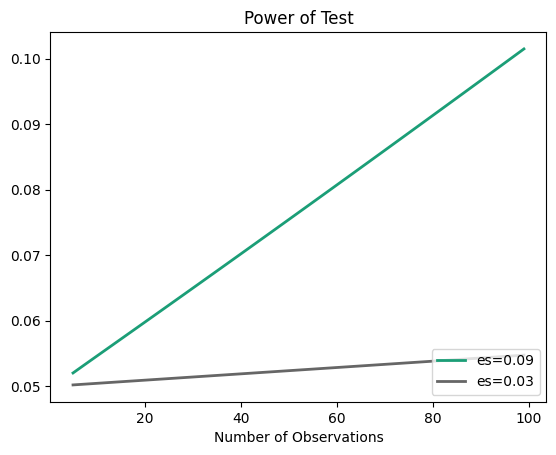

In [12]:
# plot power curve
effect_sizes = np.array([effect_size1, effect_size])
sample_sizes = np.array(range(5,100))

# plot curves 
analysis.plot_power(dep_var='nobs', nobs=sample_sizes,
                    effect_size=effect_sizes)
plt.show()

In [ ]:
!pip3 install pingouin

In [14]:
#ANCOVA 
import pingouin as pg 

'''
Is there a significant difference in the likelihood of being strip-searched
between males and females, controlling for the effect of year. 
'''
df = pd.read_csv('Arrests_and_Strip_Searches_(RBDC-ARR-TBL-001).csv')
cleaned_df = df.fillna(0)

custom_df = cleaned_df[['Sex', 'Arrest_Year', 'StripSearch']].copy()

results = pg.ancova(data= custom_df, dv='StripSearch', covar='Arrest_Year', between = 'Sex' )
print(results)

        Source           SS     DF            F         p-unc       np2
0          Sex     4.817646      2    25.363417  9.751825e-12  0.000777
1  Arrest_Year   664.579873      1  6997.615185  0.000000e+00  0.096827
2     Residual  6199.034434  65272          NaN           NaN       NaN


In [19]:
# Logistic Regression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
import statsmodels.api
'''
Does Sex have a significant effect on
the likelihood of being strip-searched
'''

# read data from CSV file
df = pd.read_csv('Arrests_and_Strip_Searches_(RBDC-ARR-TBL-001).csv')
cleaned_df = df.fillna(0)

# select relevant features
custom_df = cleaned_df[['Sex', 'Arrest_Year', 'StripSearch']].copy()

custom_df['Sex'] = custom_df['Sex'].drop(custom_df[custom_df['Sex'] == 'U'].index) # remove Unidentified value in 'Sex' feature because we are looking at Female and Male in the Sex category


# one-hot encode non-numerical feature 
one_hot_encoded = pd.get_dummies(custom_df['Sex'])

# add one-hot encoded columns to original dataframe 
data = pd.concat([custom_df, one_hot_encoded], axis=1)

# remove original categorical feature 
data = data.drop('Sex', axis=1)

# add intercept to feature matrix
data = sm.add_constant(data)
print(data)

# split data into training and test sets
X = data.drop('StripSearch', axis=1)
y = data['StripSearch']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# fit logistic regression model with lbfgs solver
# used the lbfgs solver algorithm found here: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html 
#to avoid infinity values 
model = sm.Logit(y_train, X_train).fit()

# print logistic regression results
print(model.summary())

       const  Arrest_Year  StripSearch  F  M
0        1.0         2020            0  0  1
1        1.0         2020            0  0  1
2        1.0         2020            0  0  1
3        1.0         2021            0  0  1
4        1.0         2021            0  0  1
...      ...          ...          ... .. ..
65271    1.0         2021            0  1  0
65272    1.0         2021            0  0  1
65273    1.0         2021            0  1  0
65274    1.0         2021            0  0  1
65275    1.0         2021            0  0  1

[65276 rows x 5 columns]
         Current function value: 0.312294
         Iterations: 35


/usr/local/lib/python3.9/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                           Logit Regression Results                           
Dep. Variable:            StripSearch   No. Observations:                52220
Model:                          Logit   Df Residuals:                    52216
Method:                           MLE   Df Model:                            3
Date:                Sun, 16 Apr 2023   Pseudo R-squ.:                  0.1517
Time:                        16:24:01   Log-Likelihood:                -16308.
converged:                      False   LL-Null:                       -19224.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const        5258.0231    157.883     33.303      0.000    4948.579    5567.467
Arrest_Year    -2.6082      0.045    -57.392      0.000      -2.697      -2.519
F               9.0766    128.448      0.071    

In [20]:
# Odds Ratio 
np.exp(model.params)

/usr/local/lib/python3.9/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*inputs, **kwargs)


const                   inf
Arrest_Year    7.366819e-02
F              8.747764e+03
M              1.104439e+04
dtype: float64

In [21]:
# For the categorical features

params = model.params
conf = model.conf_int()
conf['OR'] = params
conf.columns = ["Lower CI", "Upper CI", "OR"]
np.exp(conf)

/usr/local/lib/python3.9/dist-packages/pandas/core/internals/blocks.py:351: RuntimeWarning: overflow encountered in exp
  result = func(self.values, **kwargs)


,Lower CI,Upper CI,OR
const,inf,inf,inf
Arrest_Year,6.739020e-02,8.053103e-02,7.366819e-02
F,4.043499e-106,1.892504e+113,8.747764e+03
M,5.105110e-106,2.389341e+113,1.104439e+04


In [22]:
from sklearn.metrics import confusion_matrix, accuracy_score

# Predict responses
y_pred = model.predict(X_test)

# Round() rounds to nearest integer;
# 0.5 rounds to 0; 0.501 rounds to 1
predictions = list(map(round, y_pred))

# Evaluate model performance
accuracy = accuracy_score(y_test, predictions)
confusion_mat = confusion_matrix(y_test, predictions)

print('Accuracy:', accuracy)
print('Confusion matrix:', confusion_mat)

Accuracy: 0.8848805147058824
Confusion matrix: [[11553     0]
 [ 1503     0]]


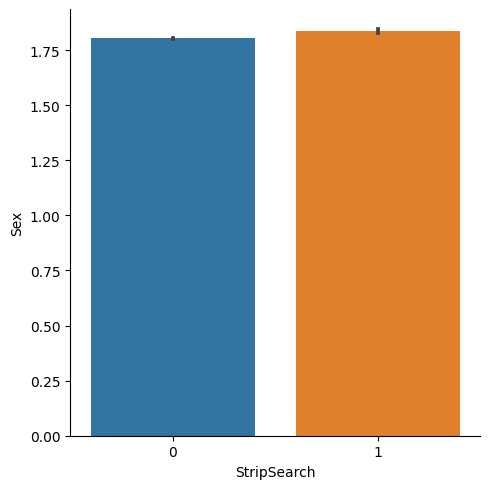

<ipython-input-41-7e18fa60c494>:8: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(cleaned_dataset.corr()) # Correlation heat map of the data set


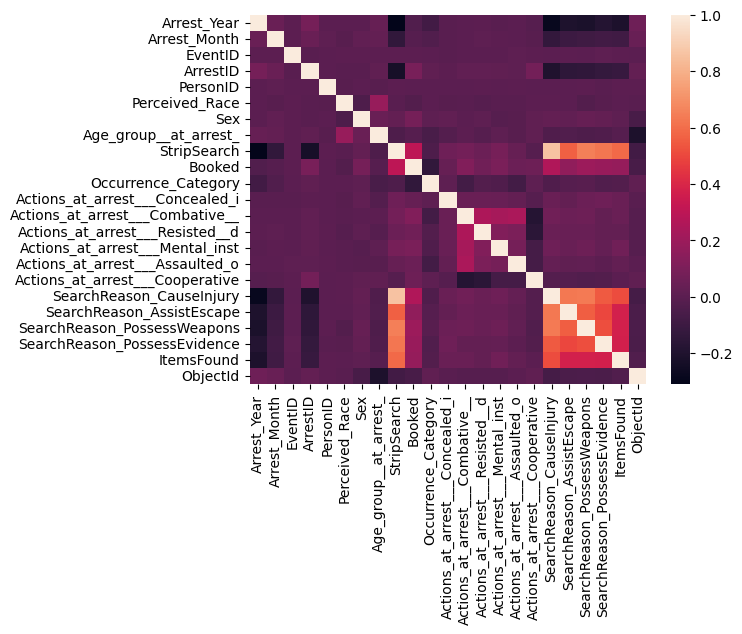

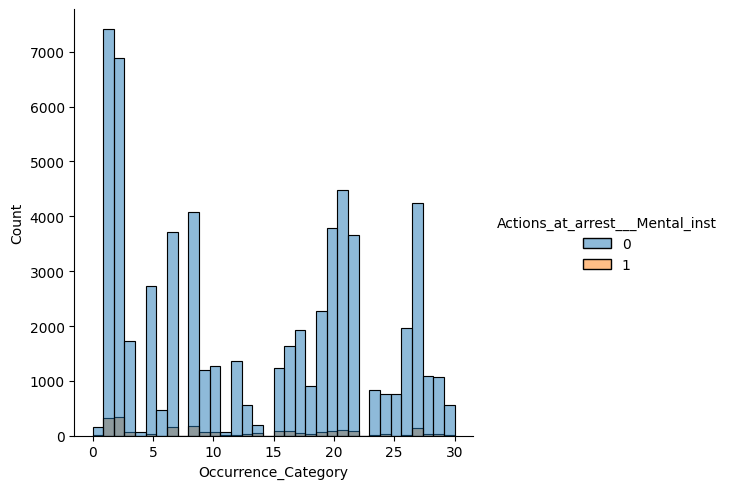

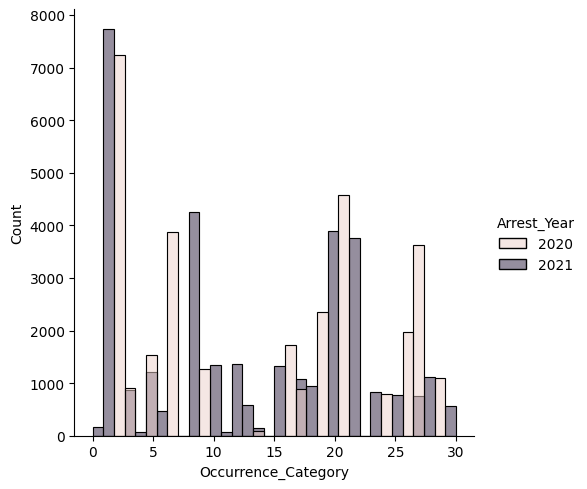

         Arrest_Year  Arrest_Month       EventID      ArrestID       PersonID  \
count   65276.000000  65276.000000  6.527600e+04  6.527600e+04   65276.000000   
unique           NaN           NaN           NaN           NaN            NaN   
top              NaN           NaN           NaN           NaN            NaN   
freq             NaN           NaN           NaN           NaN            NaN   
mean     2020.510096      2.468319  1.029998e+06  5.989060e+06  318599.919695   
std         0.499902      1.126876  1.731809e+04  5.098329e+05   10815.387928   
min      2020.000000      1.000000  1.000000e+06  0.000000e+00  300000.000000   
25%      2020.000000      1.000000  1.015001e+06  6.015850e+06  309215.000000   
50%      2021.000000      2.000000  1.030006e+06  6.032168e+06  318595.500000   
75%      2021.000000      3.000000  1.044996e+06  6.048485e+06  327926.250000   
max      2021.000000      4.000000  1.060002e+06  6.064804e+06  337346.000000   

        Perceived_Race     

In [ ]:
dataset = clean_data('Arrests_and_Strip_Searches_(RBDC-ARR-TBL-001).csv')